# Real estate
### classification and regression model  

### Support vector regression model

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv(r"C:\Users\Aditi k\OneDrive\Desktop\aditi\courses\ML HCF notes\15 projects HCF\Real_Estate_capstone_project\data.csv").dropna()

X = df.drop(columns=["MEDV"])
y = df["MEDV"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model
model = SVR(kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("SVR R²:", r2_score(y_test, y_pred))
print("SVR MAE:", mean_absolute_error(y_test, y_pred))
print("SVR RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


SVR R²: 0.6435934097674052
SVR MAE: 2.9756579071345626
SVR RMSE: 4.877212282280355


###  Decision Tree Regressor

In [2]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Decision Tree R²:", r2_score(y_test, y_pred))
print("Decision Tree MAE:", mean_absolute_error(y_test, y_pred))
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Decision Tree R²: 0.6115066599516228
Decision Tree MAE: 2.953921568627451
Decision Tree RMSE: 5.09202567650597


### Random Forest Regressor

In [3]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Random Forest R²: 0.7835125772491784
Random Forest MAE: 2.486019607843138
Random Forest RMSE: 3.8011510769507613


### Support Vector Classifier (SVC)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.svm import SVC
df = pd.read_csv("data.csv").dropna()
X = df.drop(columns=["MEDV"])
y = (df["MEDV"] >= df["MEDV"].median()).astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = SVC(kernel="rbf")
model.fit(X_train, y_train)

print("SVC Classification Report:\n", classification_report(y_test, model.predict(X_test)))

SVC Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88        53
           1       0.86      0.90      0.88        49

    accuracy                           0.88       102
   macro avg       0.88      0.88      0.88       102
weighted avg       0.88      0.88      0.88       102



### Gaussian Naive Bayes

In [5]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

print("Naive Bayes Classification Report:\n", classification_report(y_test, model.predict(X_test)))

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.68      0.77        53
           1       0.73      0.92      0.81        49

    accuracy                           0.79       102
   macro avg       0.81      0.80      0.79       102
weighted avg       0.82      0.79      0.79       102



###  Decision Tree Classifier

In [6]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

print("Decision Tree Classification Report:\n", classification_report(y_test, model.predict(X_test)))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.82        53
           1       0.78      0.88      0.83        49

    accuracy                           0.82       102
   macro avg       0.83      0.83      0.82       102
weighted avg       0.83      0.82      0.82       102



### Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Random Forest Classification Report:\n", classification_report(y_test, model.predict(X_test)))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        53
           1       0.92      0.92      0.92        49

    accuracy                           0.92       102
   macro avg       0.92      0.92      0.92       102
weighted avg       0.92      0.92      0.92       102



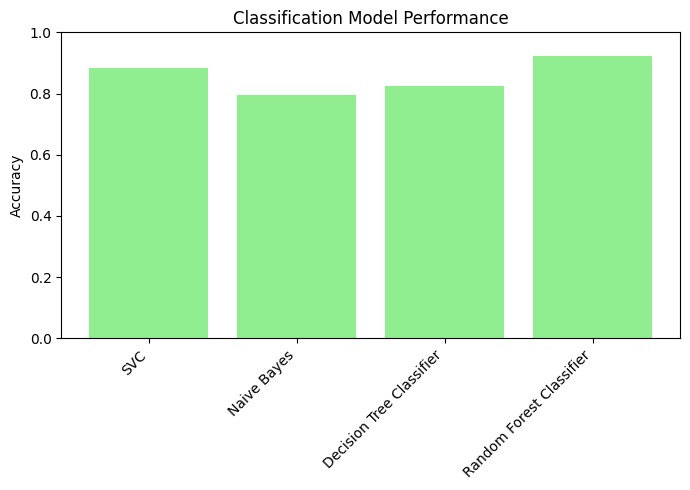

In [25]:
plt.figure(figsize=(7,5))
plt.bar(classification_scores.keys(), classification_scores.values(), color='lightgreen')
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Classification Model Performance")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

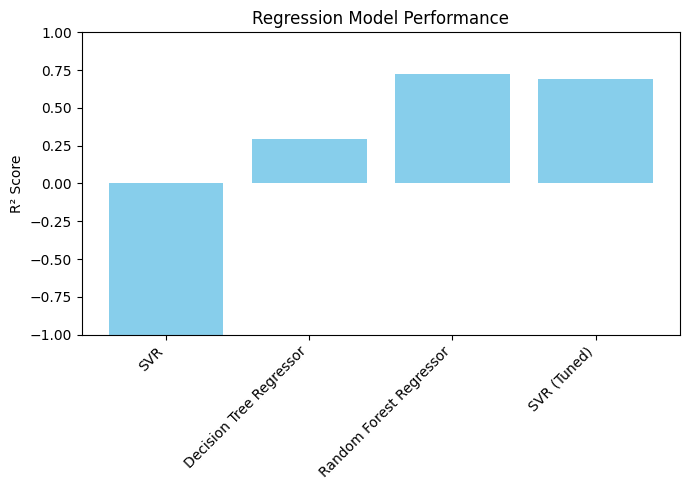

In [26]:
plt.figure(figsize=(7,5))
plt.bar(regression_scores.keys(), regression_scores.values(), color='skyblue')
plt.ylabel("R² Score")
plt.ylim(-1, 1)  # Keep scale consistent and readable
plt.title("Regression Model Performance")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

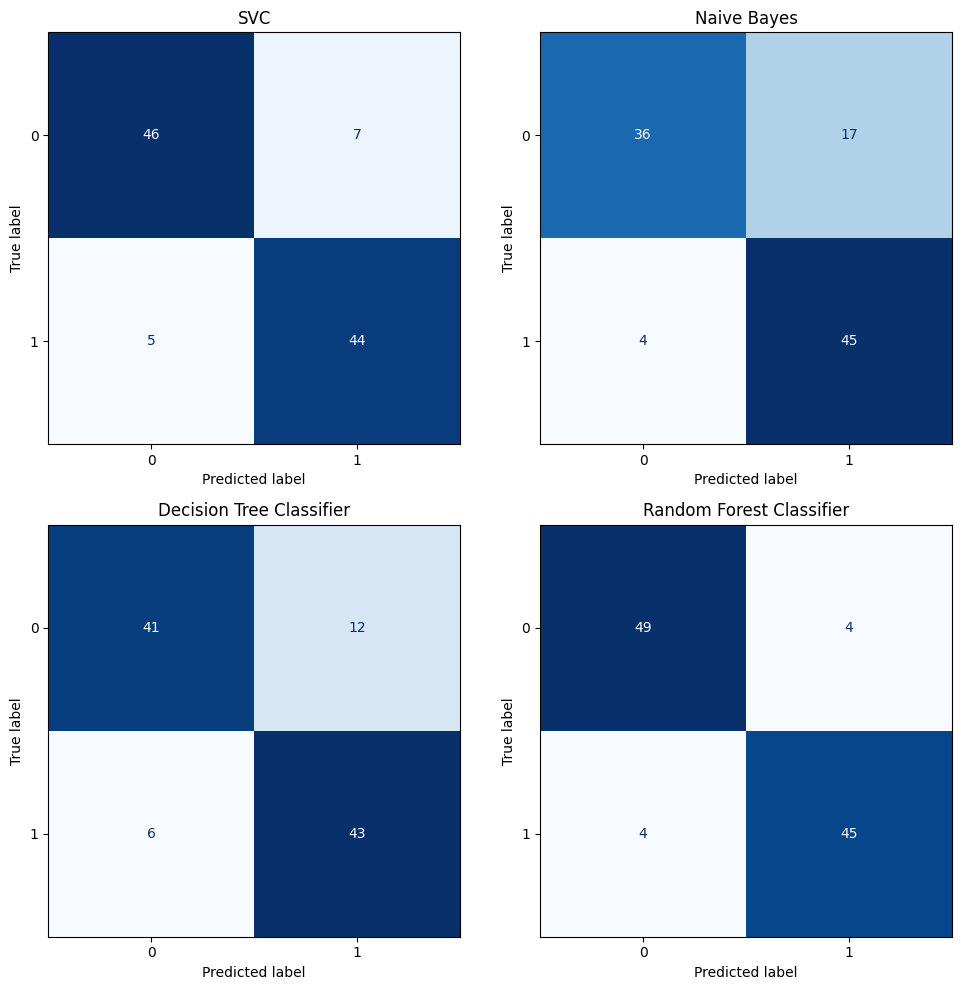

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# List of models to evaluate
models = {
    "SVC": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42)
}

# Fit, predict, and plot confusion matrices
plt.figure(figsize=(10, 10))

for i, (name, clf) in enumerate(models.items(), start=1):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    plt.subplot(2, 2, i)
    disp.plot(ax=plt.gca(), cmap='Blues', colorbar=False)
    plt.title(name)

plt.tight_layout()
plt.show()
